# Electricity Demand Forecast

In this exercise our job is to predict the usage of electricity (in trillion watts) on a per month basis for the next 1 to 2 years. For this purpose we are going to use time series model to forecast the electricity demand. 

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the data
ed = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Projects\\electricity demand\\Electricity Consumption.csv')
ed.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [3]:
# Data preprocessing
ed['DATE'] = pd.to_datetime(ed['DATE'])
ed.set_index('DATE', inplace=True)

In [5]:
# Check for missing values
missing_values = ed.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Electricty_Consumption_in_TW    0
dtype: int64


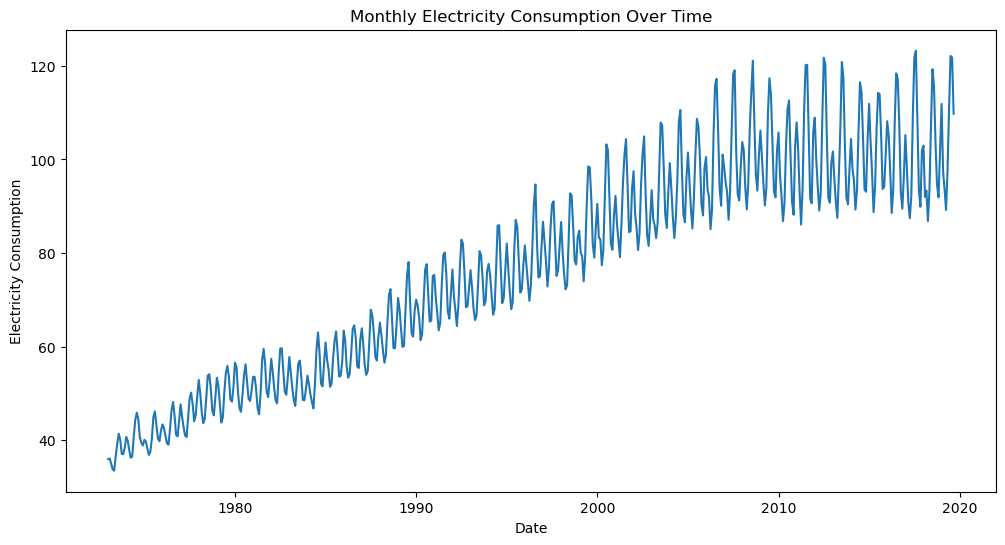

In [7]:
# Exploring the data
plt.figure(figsize=(12, 6))
plt.plot(ed['Electricty_Consumption_in_TW'])
plt.title('Monthly Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

*Remarks:We can see that the consumption of electricity is gradually increasing every decade*

In [8]:
# Time series decomposition
result = seasonal_decompose(ed['Electricty_Consumption_in_TW'], model='multiplicative')
trend = result.trend
seasonal = result.seasonal
residual = result.resid

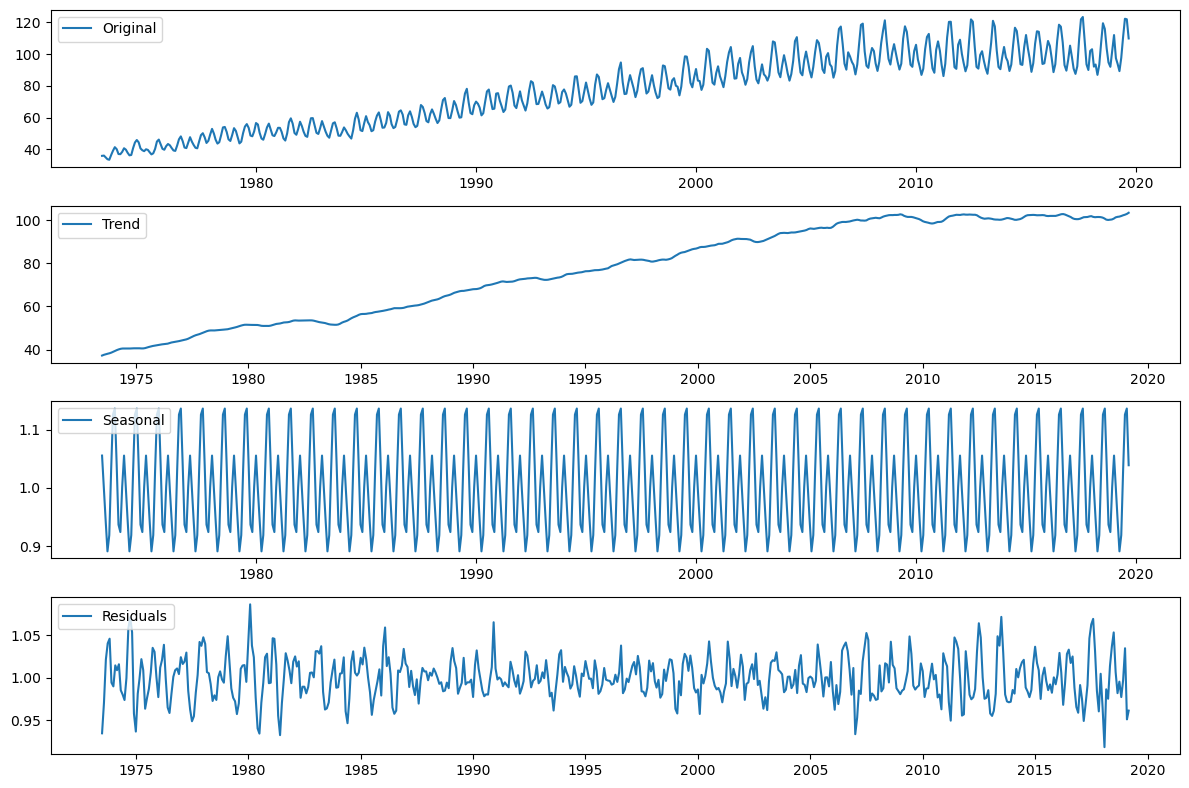

In [9]:
# Plotting the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ed['Electricty_Consumption_in_TW'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [11]:
ed

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [12]:
# Train-test split
train_end_date = '2019-09-01'
train_data = ed['Electricty_Consumption_in_TW'][:train_end_date]
test_data = ed['Electricty_Consumption_in_TW'][train_end_date:]
forecast_steps = 24 

In [13]:
# Define SARIMA model parameters and seasonal parameters
best_order = (1, 1, 1)
best_seasonal_order = (1, 1, 1, 12) 

In [20]:
# Training the  model
final_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
final_results = final_model.fit()

C:\Users\sujoydutta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sujoydutta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
# Generate forecasts for the extended time horizon (24 months)
forecast = final_results.get_forecast(steps=forecast_steps)

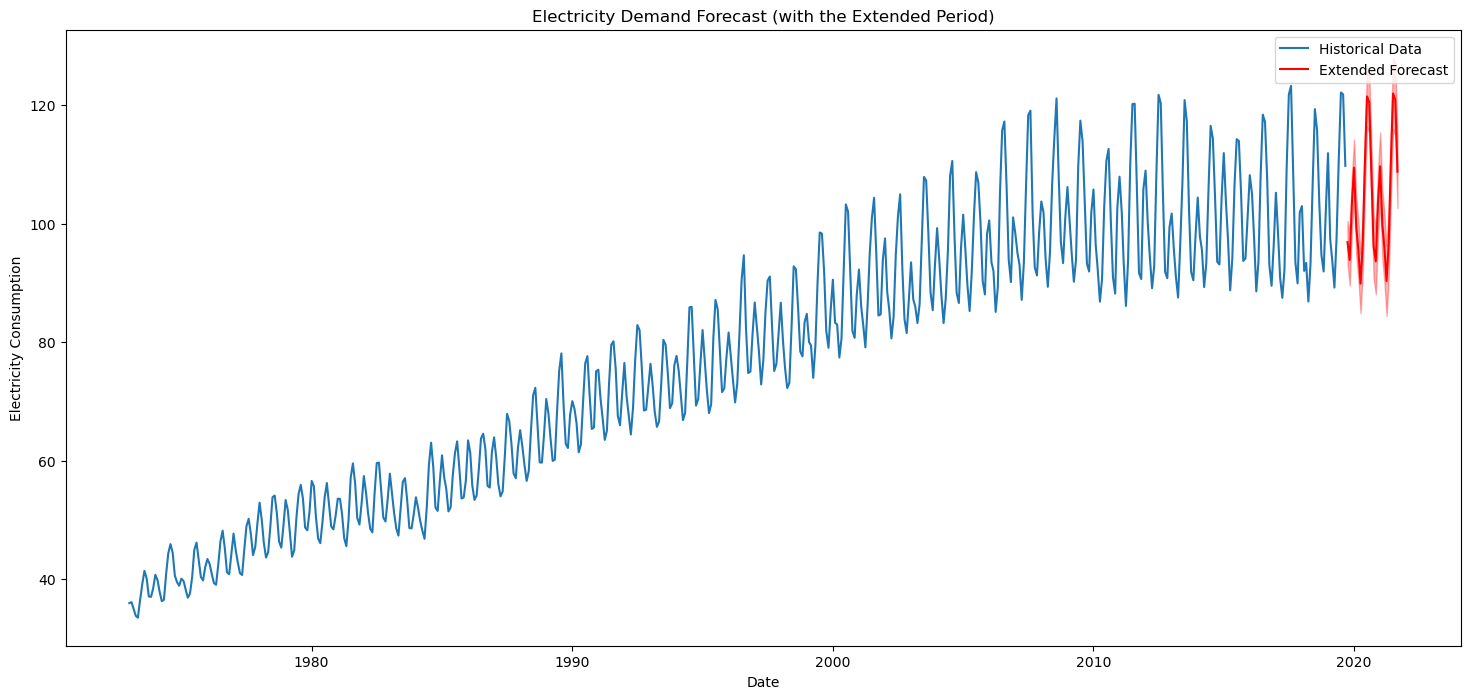

In [29]:
# Plotting the historical data and the extended forecast

plt.figure(figsize=(18, 8))
plt.plot(ed['Electricty_Consumption_in_TW'], label='Historical Data')
plt.plot(forecast_mean, label='Extended Forecast', color='red')
plt.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('Electricity Demand Forecast (with the Extended Period)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.show()

In [30]:
#  demand estimation for the extended period 
forecasted_demand = forecast_mean.tail(forecast_steps) 
print("Forecasted Demand until September 2021 (Monthly):\n", forecasted_demand)

Forecasted Demand until September 2021 (Monthly):
 2019-10-01     96.859805
2019-11-01     93.841741
2019-12-01    103.157294
2020-01-01    109.417386
2020-02-01     99.468211
2020-03-01     95.625303
2020-04-01     89.860638
2020-05-01     96.238400
2020-06-01    110.259291
2020-07-01    121.434434
2020-08-01    120.425507
2020-09-01    108.249636
2020-10-01     96.162196
2020-11-01     93.612768
2020-12-01    103.212889
2021-01-01    109.645775
2021-02-01     99.801535
2021-03-01     96.022342
2021-04-01     90.296365
2021-05-01     96.697618
2021-06-01    110.732776
2021-07-01    121.916581
2021-08-01    120.912914
2021-09-01    108.740237
Freq: MS, Name: predicted_mean, dtype: float64


**Remark**

We can say that the time series is relatively stable and we can assume that it will stay the same unless an out of control external event like acts of God or technological advancement disrupts it. The demand is relatively higher in the summer months(June, July, August)  as we can assume people require air conditioning.However the demand is considerably lower during the winter months (December, January, February),hence we can say that month has an impact on electricity demand. 